# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Salsabilla Wachid]
- **Email:** [salsabillawachid@students.unnes.ac.id]
- **ID Dicoding:** [salsabilla_wachid]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi antara pengguna casual dan terdaftar registered pada berbagai kondisi cuaca dan musim?
- Bagaimana kondisi temperatur/suhu pada setiap musim dimana orang-orang ramai menyewa sepeda?
- Apakah terdapat perbedaan jam ramai pada hari kerja dan hari libur? dan jam berapa itu?
- Pada bulan apa orang-orang ramai menyewa sepeda? sebutkan juga faktor yang mempengaruhinya!
- Apakah terdapat tren peningkatan penggunaan sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [60]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Menampilkan versi dari library yang digunakan
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.7.1
Seaborn version: 0.13.1


## Data Wrangling

### Gathering Data

In [75]:
#Membaca dataset day dan data hour dengan format csv
day = pd.read_csv("/content/day.csv")
hour = pd.read_csv("/content/hour.csv")

In [76]:
#Memuat tabel dataset day
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
#Memuat tabel dataset hour
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day: mencatat jumlah peminjam sepeda per hari dari 2011-2012
- Data Hour: mencatat jumlah peminjam sepeda per jam dari 2011-2012
- Variable yang berbeda: penambahan hr pada data hour

### Assessing Data

#### a) Menilai Dataset Day

In [78]:
#Memeriksa tipe dataset day
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [79]:
#Memeriksa apakah terdapat missing value pada dataset day
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [80]:
#Memeriksa apakah terdapat data duplicate pada dataset day
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [81]:
#Memeriksa outlier pada kolom 'temp', 'atemp', 'hum', dan 'windspeed'
#karena kolom tersebut bukan merupakan data yang tidak memiliki kategori nilai yang sudah ditentukan

def find_outliers(data, column):
    q25, q75 = data[column].quantile(0.25), data[column].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 3
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return [x for x in data[column] if x < minimum or x > maximum]

# Mencari outlier untuk kolom 'temp', 'atemp', dan 'hum'
day_outliers_temp = find_outliers(day, 'temp')
day_outliers_atemp = find_outliers(day, 'atemp')
day_outliers_hum = find_outliers(day, 'hum')
day_outliers_windspeed = find_outliers(day, 'windspeed')

print("Outliers pada 'temp': ", day_outliers_temp)
print("Outliers pada 'atemp': ", day_outliers_atemp)
print("Outliers pada 'hum': ", day_outliers_hum)
print("Outliers pada 'windspeed': ", day_outliers_windspeed)

Outliers pada 'temp':  []
Outliers pada 'atemp':  []
Outliers pada 'hum':  []
Outliers pada 'windspeed':  []


In [82]:
#Mengecek apakah terdapat nilai 0 atau 1 pada kolom 'temp', 'atemp', 'hum', 'windspeed'

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']

for column in columns_to_check:
    count_invalid = day[column].isin([0, 1]).sum()
    print(f"Jumlah nilai 0 atau 1 pada kolom {column}: {count_invalid}")

Jumlah nilai 0 atau 1 pada kolom temp: 0
Jumlah nilai 0 atau 1 pada kolom atemp: 0
Jumlah nilai 0 atau 1 pada kolom hum: 1
Jumlah nilai 0 atau 1 pada kolom windspeed: 0


In [83]:
#Memeriksa nilai di luar rentang 0-1 pada kolom 'temp', 'atemp', 'hum', 'windspeed'

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']
invalid_values = day[~day[columns_to_check].apply(lambda x: x.between(0, 1)).all(axis=1)]
print(invalid_values)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [84]:
#Memeriksa apakah terdapat nilai tidak invalid pada dataset day

#data 'dteday'
day_invalid_date = day[~day['dteday'].str.match(r'^\d{4}-\d{2}-\d{2}$') |
                     (day['dteday'] < '2011-01-01') |
                     (day['dteday'] > '2012-12-31')]
print("Nilai tidak valid pada 'dteday': ", day_invalid_date['dteday'].unique())

#data 'season' dll
def check_invalid_values(column, valid_range):
    unique_values = column.unique()
    invalid_values = [value for value in unique_values if value not in valid_range]
    print(f"Nilai tidak valid pada '{column.name}': ", invalid_values)

check_invalid_values(day['season'], range(1, 5))
check_invalid_values(day['yr'], range(0, 2))
check_invalid_values(day['mnth'], range(1, 13))
check_invalid_values(day['holiday'], range(0, 2))
check_invalid_values(day['weekday'], range(0, 7))
check_invalid_values(day['workingday'], range(0, 2))
check_invalid_values(day['weathersit'], range(1, 5))
check_invalid_values(day['mnth'], range(1, 13))

#data 'casual', 'registered', 'cnt'
invalid_d = day[day['cnt'] != (day['casual'] + day['registered'])]

if invalid_d.empty:
    print("Nilai tidak valid pada data 'casual', 'registered', 'cnt': []")
else:
    print("Data c tidak valid pada baris berikut:")
    print(invalid_d)

Nilai tidak valid pada 'dteday':  []
Nilai tidak valid pada 'season':  []
Nilai tidak valid pada 'yr':  []
Nilai tidak valid pada 'mnth':  []
Nilai tidak valid pada 'holiday':  []
Nilai tidak valid pada 'weekday':  []
Nilai tidak valid pada 'workingday':  []
Nilai tidak valid pada 'weathersit':  []
Nilai tidak valid pada 'mnth':  []
Nilai tidak valid pada data 'casual', 'registered', 'cnt': []


#### b) Menilai Dataset Hour

In [85]:
#Memeriksa tipe dataset hour
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
#Memeriksa apakah terdapat missing value pada dataset hour
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [87]:
#Memeriksa apakah terdapat data duplicate pada dataset day
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [88]:
#Memeriksa outlier pada kolom 'temp', 'atemp', dan 'hum'
#karena kolom tersebut bukan merupakan data yang tidak memiliki kategori nilai yang sudah ditentukan

def find_outliers(data, column):
    q25, q75 = data[column].quantile(0.25), data[column].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 3
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return [x for x in data[column] if x < minimum or x > maximum]

# Mencari outlier untuk kolom 'temp', 'atemp', dan 'hum'
hour_outliers_temp = find_outliers(hour, 'temp')
hour_outliers_atemp = find_outliers(hour, 'atemp')
hour_outliers_hum = find_outliers(hour, 'hum')
hour_outliers_windspeed = find_outliers(hour, 'windspeed')

print("Outliers pada 'temp': ", hour_outliers_temp)
print("Outliers pada 'atemp': ", hour_outliers_atemp)
print("Outliers pada 'hum': ", hour_outliers_hum)
print("Outliers pada 'windspeed': ", hour_outliers_windspeed)

Outliers pada 'temp':  []
Outliers pada 'atemp':  []
Outliers pada 'hum':  []
Outliers pada 'windspeed':  [0.7761, 0.7463, 0.806, 0.7463, 0.8507, 0.8507, 0.8358, 0.7164, 0.806, 0.7164]


note: terdapat outlier pada kolom 'windspeed' namun nilai outlier tersebut memenuhi standar normalisasi antara 0-1

In [89]:
#Mengecek apakah terdapat nilai 0 atau 1 pada kolom 'temp', 'atemp', 'hum', 'windspeed'

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']

for column in columns_to_check:
    count_invalid = hour[column].isin([0, 1]).sum()
    print(f"Jumlah nilai 0 atau 1 pada kolom {column}: {count_invalid}")

Jumlah nilai 0 atau 1 pada kolom temp: 1
Jumlah nilai 0 atau 1 pada kolom atemp: 3
Jumlah nilai 0 atau 1 pada kolom hum: 292
Jumlah nilai 0 atau 1 pada kolom windspeed: 2180


In [90]:
#Memeriksa nilai di luar rentang 0-1 pada kolom 'temp', 'atemp', 'hum', 'windspeed'

columns_to_check = ['temp', 'atemp', 'hum', 'windspeed']
invalid_values = hour[~hour[columns_to_check].apply(lambda x: x.between(0, 1)).all(axis=1)]
print(invalid_values)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [91]:
#Memeriksa apakah terdapat nilai tidak valid pada dataset hour

#data 'dteday'
hour_invalid_date = hour[~hour['dteday'].str.match(r'^\d{4}-\d{2}-\d{2}$') |
                     (hour['dteday'] < '2011-01-01') |
                     (hour['dteday'] > '2012-12-31')]
print("Nilai tidak valid pada 'dteday': ", hour_invalid_date['dteday'].unique())

#data 'season' dll
def check_invalid_values(column, valid_range):
    unique_values = column.unique()
    invalid_values = [value for value in unique_values if value not in valid_range]
    print(f"Nilai tidak valid pada '{column.name}': ", invalid_values)

check_invalid_values(hour['season'], range(1, 5))
check_invalid_values(hour['yr'], range(0, 2))
check_invalid_values(hour['mnth'], range(1, 13))
check_invalid_values(hour['hr'], range(0, 24))
check_invalid_values(hour['holiday'], range(0, 2))
check_invalid_values(hour['weekday'], range(0, 7))
check_invalid_values(hour['workingday'], range(0, 2))
check_invalid_values(hour['weathersit'], range(1, 5))
check_invalid_values(hour['mnth'], range(1, 13))

#data 'casual', 'registered', 'cnt'
invalid_c = hour[hour['cnt'] != (hour['casual'] + hour['registered'])]

if invalid_c.empty:
    print("Nilai tidak valid pada data 'casual', 'registered', 'cnt': []")
else:
    print("Data c tidak valid pada baris berikut:")
    print(invalid_c)

Nilai tidak valid pada 'dteday':  []
Nilai tidak valid pada 'season':  []
Nilai tidak valid pada 'yr':  []
Nilai tidak valid pada 'mnth':  []
Nilai tidak valid pada 'hr':  []
Nilai tidak valid pada 'holiday':  []
Nilai tidak valid pada 'weekday':  []
Nilai tidak valid pada 'workingday':  []
Nilai tidak valid pada 'weathersit':  []
Nilai tidak valid pada 'mnth':  []
Nilai tidak valid pada data 'casual', 'registered', 'cnt': []


**Insight:**
- Tidak terdapat missing value, duplikat data, dan invalid value pada kedua dataset
- Terdapat nilai outlier pada data yang sudah ternormalisasi

### Cleaning Data

**Insight:**
- Tidak perlu dilakukan cleaning data karena data bebas dari missing value, duplikat data, dan invalid data
- Terdapat data outlier namun nilai yang tertera sudah sesuai dengan standar awal penulisan nilai pada kolom tersebut (normalisasi rentang 0-1). Dan tidak ada juga nilai di luar rentang 0-1, jadi tidak memerlukan cleaning data untuk outlier.

## Exploratory Data Analysis (EDA)

### a) Eksplorasi Dataset Day

In [119]:
#Memeriksa parameter statistik (mean, median, mode, dll)
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [120]:
#Melihat jumlah pelanggan yang menyewa sepeda berdasarkan bulan
print(day.groupby(by="mnth").cnt.sum().sort_values(ascending=False), "\n")

#Melihat jumlah pelanggan yang menyewa sepeda berdasarkan hari libur atau tidak
print(day.groupby(by="workingday").cnt.sum().sort_values(ascending=False))

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64 

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64


In [121]:
#Melihat jumlah pelanggan yang menyewa sepeda berdasarkan musim
#serta parameter statistik dari suhu, kelembapan, serta windspeed per musim

day.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

cnt      temp                                     hum            \
            sum       max       min      mean       std       max       min   
season                                                                        
1        471348  0.572500  0.059130  0.297748  0.102735  0.948261  0.000000   
2        918589  0.808333  0.253043  0.544405  0.122650  0.922500  0.254167   
3       1061129  0.861667  0.469167  0.706309  0.070848  0.939565  0.360000   
4        841613  0.657500  0.220833  0.422906  0.107834  0.972500  0.333478   

                           windspeed                                
            mean       std       max       min      mean       std  
season                                                              
1       0.582903  0.151880  0.507463  0.045408  0.214537  0.086439  
2       0.626948  0.152841  0.388067  0.065929  0.203507  0.071629  
3       0.633482  0.119349  0.375617  0.064071  0.172095  0.059526  
4       0.668719  0.131248  0.422275  0.022392  0.171995  0.081565

In [122]:
#Melihat jumlah pelanggan yang menyewa sepeda berdasarkan musim
#serta parameter statistik dari suhu, kelembapan, serta windspeed per musim

day.groupby(by="weathersit").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"],
})

cnt      temp                                    hum  \
                sum       max      min      mean       std       max   
weathersit                                                             
1           2257952  0.861667  0.05913  0.511541  0.191165  0.835833   
2            996858  0.815000  0.10750  0.470366  0.167180  0.972500   
3             37869  0.633913  0.21750  0.433440  0.131473  0.970417   

                                         windspeed                      \
                 min      mean       std       max       min      mean   
weathersit                                                               
1           0.187917  0.565594  0.112472  0.507463  0.022392  0.190253   
2           0.407083  0.725887  0.109648  0.414800  0.047275  0.186431   
3           0.000000  0.848872  0.201572  0.358200  0.097021  0.243336   

                      
                 std  
weathersit            
1           0.077530  
2           0.075331  
3           0.086185

In [123]:
#Melihat jumlah persebaran sewa sepeda pada hari libur dan biasa setiap bulan
#serta melihat jumlah hari biasa dan hari libur per bulannya

day.groupby(by=["mnth", "workingday"]).agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

instant  casual  registered     cnt
mnth workingday                                     
1    0                22    6709       34308   41017
     1                40    5333       88583   93916
2    0                18    7977       32371   40348
     1                39    6986      104018  111004
3    0                17   20904       40953   61857
     1                45   23540      143523  167063
4    0                20   32752       56507   89259
     1                40   28050      151785  179835
5    0                19   40608       65243  105851
     1                43   34677      191158  225835
6    0                17   36379       68238  104617
     1                43   37527      204198  241725
7    0                21   39930       73588  113518
     1                41   38227      193203  231430
8    0                16   26293       53122   79415
     1                46   45746      226033  271779
9    0                20   41135       81229  122364
     1                40   29188      194439  223627
10   0                20   32546       69669  102215
     1                42   27214      192923  220137
11   0                20   20914       59956   80870
     1                40   15689      158272  173961
12   0                21   10585       48353   58938
     1                41   11108      140990  152098

In [124]:
#(1) Melihat distribusi antara pengguna casual dan registered pada berbagai kondisi musim
print("casual customers: ", day.groupby(by="season").casual.sum().sort_values(ascending=False), "\n")
print("registered customers: ", day.groupby(by="season").registered.sum().sort_values(ascending=False))

casual customers:  season
3    226091
2    203522
4    129782
1     60622
Name: casual, dtype: int64 

registered customers:  season
3    835038
2    715067
4    711831
1    410726
Name: registered, dtype: int64


In [125]:
#(1) Melihat distribusi antara pengguna casual dan registered pada berbagai kondisi cuaca

print("casual customers: ", day.groupby(by="weathersit").casual.sum().sort_values(ascending=False), "\n")
print("registered customers: ", day.groupby(by="weathersit").registered.sum().sort_values(ascending=False))

casual customers:  weathersit
1    446346
2    169776
3      3895
Name: casual, dtype: int64 

registered customers:  weathersit
1    1811606
2     827082
3      33974
Name: registered, dtype: int64


In [126]:
#(2) Bagaimana kondisi temperatur/suhu pada setiap musim dimana orang-orang ramai menyewa sepeda?

# Membagi suhu menjadi rentang
bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0']
day['temp_range'] = pd.cut(day['temp'], bins=bins, labels=labels, include_lowest=True)

day.groupby(by=["season", "temp_range"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

<ipython-input-126-852d72643e80>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby(by=["season", "temp_range"]).agg({


casual   registered          cnt
season temp_range                                       
1      0-0.25       123.830508  1509.932203  1633.762712
       0.25-0.5     384.203540  2491.681416  2875.884956
       0.5-0.75    1100.111111  4453.333333  5553.444444
       0.75-1.0            NaN          NaN          NaN
2      0-0.25              NaN          NaN          NaN
       0.25-0.5     880.796875  3202.531250  4083.328125
       0.5-0.75    1254.728070  4273.228070  5527.956140
       0.75-1.0     685.333333  3826.166667  4511.500000
3      0-0.25              NaN          NaN          NaN
       0.25-0.5    1088.000000  3547.500000  4635.500000
       0.5-0.75    1226.928058  4473.553957  5700.482014
       0.75-1.0    1135.574468  4385.510638  5521.085106
4      0-0.25       262.250000  2464.750000  2727.000000
       0.25-0.5     605.424000  3770.504000  4375.928000
       0.5-0.75    1082.755102  4707.326531  5790.081633
       0.75-1.0            NaN          NaN          NaN

In [127]:
#(4) Melihat persebaran pelanggan per bulan serta faktor-faktor yang mempengaruhinya

day.groupby(by="mnth").agg({
    "workingday": lambda x: (x == 0).sum(),  #menghitung jumlah hari libur
    "season": lambda x: x.mode()[0],         #menghitung nilai mode dari season
    "weathersit": lambda x: x.mode()[0],         #menghitung nilai mode dari cuaca
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).sort_values(by="cnt", ascending=False)   #mengurutkan berdasarkan jumlah pelanggan paling besar

,workingday,season,weathersit,temp,hum,windspeed,instant,casual,registered,cnt
mnth,,,,,,,,,,
6,17,2,1,0.684097,0.575806,0.185420,60,1231.766667,4540.600000,5772.366667
9,20,3,1,0.616485,0.714714,0.165945,60,1172.050000,4594.466667,5766.516667
8,16,3,1,0.708582,0.637730,0.172918,62,1161.919355,4502.500000,5664.419355
7,21,3,1,0.755470,0.597876,0.166059,62,1260.596774,4303.080645,5563.677419
5,19,2,1,0.594798,0.688958,0.182989,62,1214.274194,4135.500000,5349.774194
10,20,4,1,0.485012,0.693761,0.175205,62,963.870968,4235.354839,5199.225806
4,20,2,1,0.469999,0.588063,0.234482,60,1013.366667,3471.533333,4484.900000
11,20,4,1,0.369220,0.624876,0.183801,60,610.050000,3637.133333,4247.183333
3,17,1,1,0.390539,0.588475,0.222699,62,716.838710,2975.419355,3692.258065


In [128]:
#(5) Melihat peningkatan penggunaan sepeda dari tahun 2011 ke 2012

day.groupby(by=["yr", "workingday"]).agg({
    "instant": "nunique",
    "temp": "mean",
    "windspeed": "mean",
    "hum": "mean",
    "casual": ["sum", "max", "min"],
    "registered": ["sum", "max", "min"],
    "cnt": ["sum", "max", "min"]
})

instant      temp windspeed       hum  casual            \
              nunique      mean      mean      mean     sum   max min   
yr workingday                                                           
0  0              115  0.473600  0.190049  0.636164  128898  3065  54   
   1              250  0.492675  0.192025  0.647115  118354  1318   9   
1  0              116  0.488759  0.195184  0.609551  187834  3410  67   
   1              250  0.511190  0.186968  0.613380  184931  2469   2   

              registered                 cnt              
                     sum   max  min      sum   max   min  
yr workingday                                             
0  0              257941  3647  451   386839  6043   605  
   1              737910  4614  416   856264  5895   431  
1  0              425596  5966  573   613430  8714  1013  
   1             1251215  6946   20  1436146  8362    22

### b) Eksplorasi Dataset Hour

In [129]:
#Memeriksa parameter statistik (mean, median, mode, dll)
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [130]:
hour.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                            
   nunique  max min        mean         std
hr                                         
0      726  283   2   53.898072   42.307910
1      724  168   1   33.375691   33.538727
2      715  132   1   22.869930   26.578642
3      697   79   1   11.727403   13.239190
4      697   28   1    6.352941    4.143818
5      717   66   1   19.889819   13.200765
6      725  213   1   76.044138   55.084348
7      727  596   1  212.064649  161.441936
8      727  839   5  359.011004  235.189285
9      727  426  14  219.309491   93.703458
10     727  539   8  173.668501  102.205413
11     727  663  10  208.143054  127.495536
12     728  776   3  253.315934  145.081134
13     729  760  11  253.661180  148.107657
14     729  750  12  240.949246  147.271574
15     729  750   7  251.233196  144.632541
16     730  783  11  311.983562  148.682618
17     730  976  15  461.452055  232.656611
18     728  977  23  425.510989  224.639304
19     728  743  11  311.523352  161.050359
20     728  567  11  226.030220  119.670164
21     728  584   6  172.314560   89.788893
22     728  502   9  131.335165   69.937782
23     728  256   2   87.831044   50.846889

In [131]:
#(3) Melihat persebaran pelanggan per jam nya pada hari biasa

hour[hour['workingday'] == 1].groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).sort_values(by="cnt", ascending=False)   #mengurutkan berdasarkan jumlah pelanggan paling besar

,casual,registered,cnt
hr,,,
17,56.895792,468.394790,525.290581
18,50.451807,441.775100,492.226908
8,22.264113,454.741935,477.006048
19,41.022088,307.379518,348.401606
16,48.344689,244.777555,293.122244
7,12.195565,278.417339,290.612903
20,31.369478,218.349398,249.718876
9,24.312500,217.205645,241.518145
15,46.333333,154.997992,201.331325


In [132]:
#(3) Melihat persebaran pelanggan per jam nya pada hari libur

hour[hour['workingday'] == 0].groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).sort_values(by="cnt", ascending=False)   #mengurutkan berdasarkan jumlah pelanggan paling besar

,casual,registered,cnt
hr,,,
13,136.424242,236.307359,372.731602
12,126.246753,240.012987,366.259740
14,139.593074,225.051948,364.645022
15,136.502165,222.311688,358.813853
16,128.614719,224.112554,352.727273
17,111.813853,211.735931,323.549784
11,106.653680,208.662338,315.316017
18,84.221739,196.834783,281.056522
10,79.268398,176.640693,255.909091


**Insight:**
- Jumlah pelanggan meningkat dalam setahun
- Terdapat beberapa faktor yang mempengaruhi besarnya minat pelanggan untuk menyewa sepeda yaitu bukan hari kerja, suhu antara 20-30, jam 14.00-18.00, cerah, musim kemarau dan gugur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi antara pengguna casual dan terdaftar registered pada berbagai kondisi cuaca dan musim?

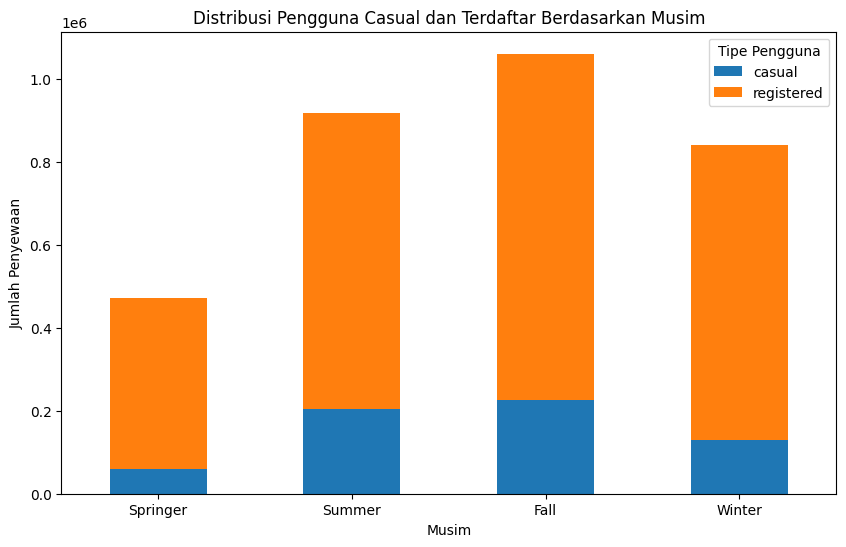

In [154]:
#(1.a) Melihat distribusi antara pengguna casual dan registered pada berbagai kondisi musim

season_distribution = day.groupby('season').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

#menyiapkan data untuk visualisasi
season_distribution.set_index('season', inplace=True)

season_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Pengguna Casual dan Terdaftar Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Springer', 'Summer', 'Fall', 'Winter'])
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.show()

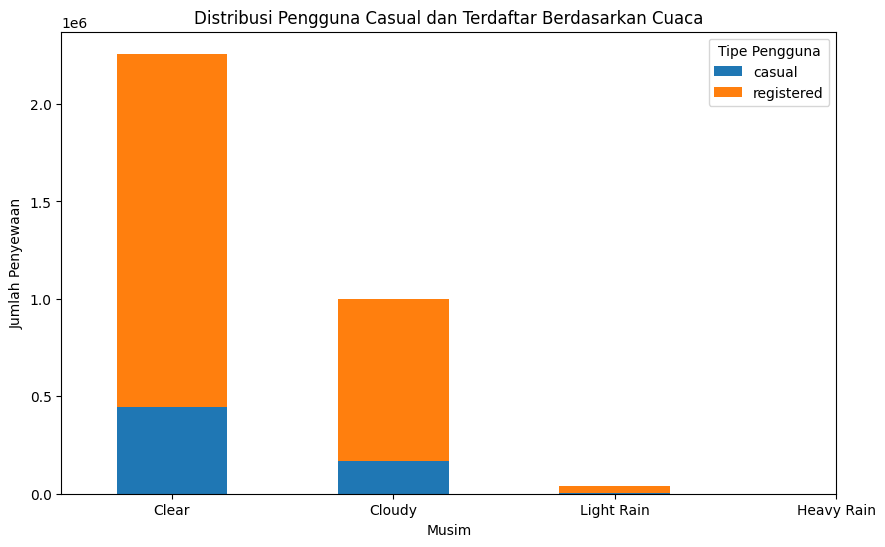

In [155]:
#(1.b) Melihat distribusi antara pengguna casual dan registered pada berbagai kondisi cuaca

season_distribution = day.groupby('weathersit').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

#menyiapkan data untuk visualisasi
season_distribution.set_index('weathersit', inplace=True)

season_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Pengguna Casual dan Terdaftar Berdasarkan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Light Rain', 'Heavy Rain'])
plt.xticks(rotation=0)
plt.legend(title='Tipe Pengguna')
plt.show()

### Pertanyaan 2: Bagaimana kondisi temperatur/suhu pada setiap musim dimana orang-orang ramai menyewa sepeda?

<ipython-input-135-d15c213c5962>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_summary = day.groupby(by=["season", "temp_range"]).agg({"cnt": "mean"}).unstack(level=0)


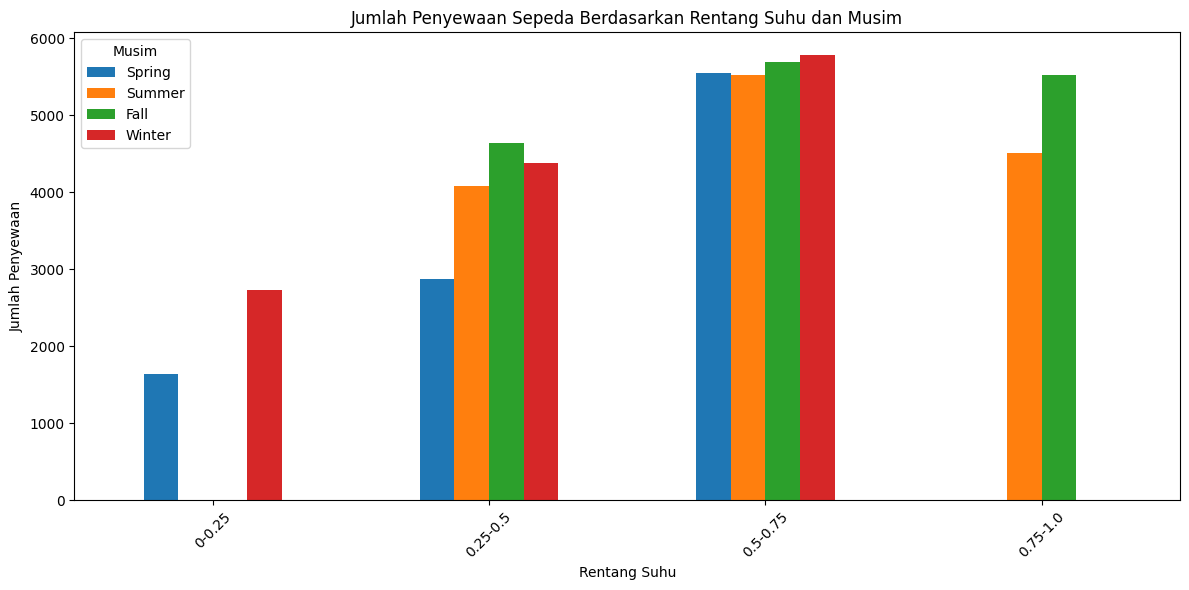

In [135]:
#(2) Bagaimana kondisi temperatur/suhu pada setiap musim dimana orang-orang ramai menyewa sepeda?

#mengelompokkan data berdasarkan musim dan rentang suhu
temperature_summary = day.groupby(by=["season", "temp_range"]).agg({"cnt": "mean"}).unstack(level=0)

temperature_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Rentang Suhu dan Musim')
plt.xlabel('Rentang Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Musim', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah terdapat perbedaan jam ramai pada hari kerja dan hari libur? dan jam berapa itu?

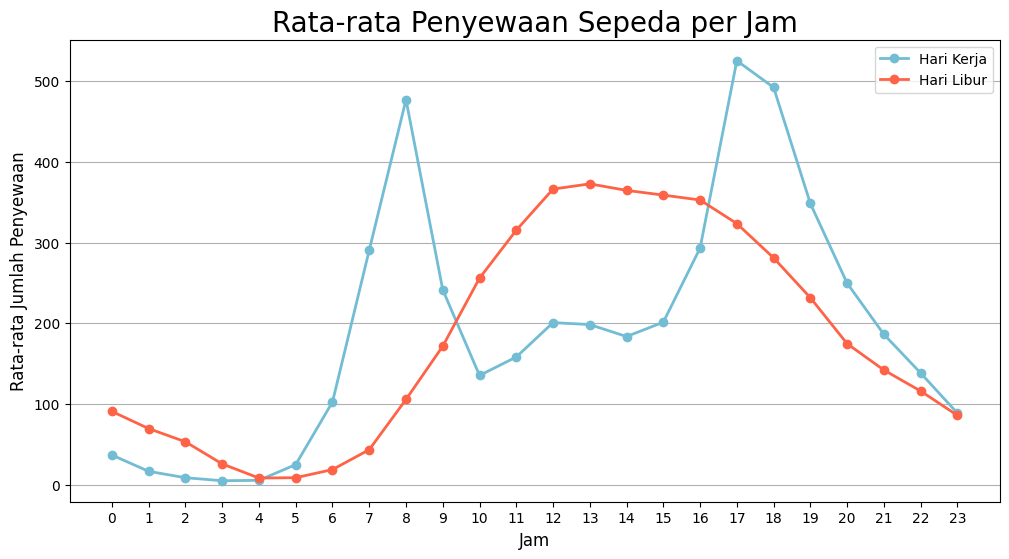

In [136]:
#(3) Menghitung rata-rata penyewaan per jam pada hari kerja

avg_rentals_working_day = hour[hour['workingday'] == 1].groupby('hr').agg({
    'cnt': 'mean'
}).sort_index()

# Menghitung rata-rata penyewaan per jam pada hari libur
avg_rentals_holiday = hour[hour['workingday'] == 0].groupby('hr').agg({
    'cnt': 'mean'
}).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_rentals_working_day.index, avg_rentals_working_day['cnt'], marker='o', linewidth=2, label='Hari Kerja', color="#72BCD4")
plt.plot(avg_rentals_holiday.index, avg_rentals_holiday['cnt'], marker='o', linewidth=2, label='Hari Libur', color="#FF6347")
plt.title("Rata-rata Penyewaan Sepeda per Jam", loc="center", fontsize=20)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.xticks(avg_rentals_working_day.index)
plt.legend()
plt.grid(axis='y')
plt.show()

### Pertanyaan 4: Pada bulan apa orang-orang ramai menyewa sepeda? sebutkan juga faktor yang mempengaruhinya!

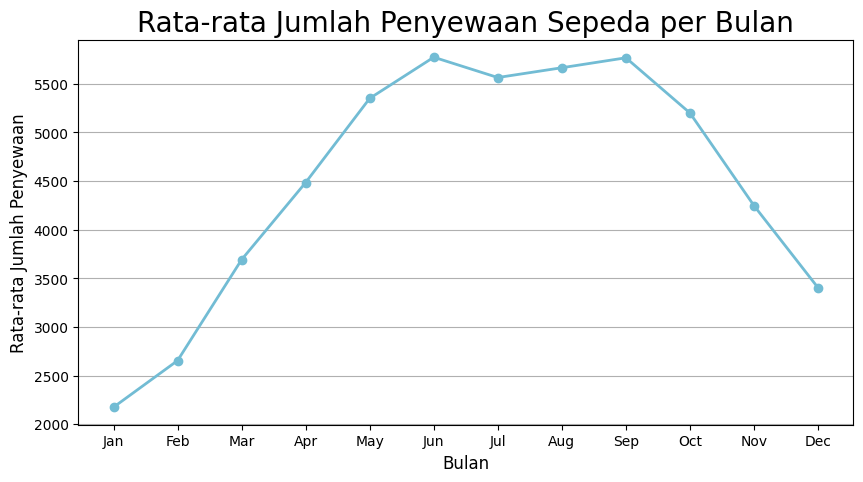

In [156]:
#(4.a) Menghitung rata-rata jumlah penyewaan per bulan

monthly_rentals = day.groupby(by="mnth").agg({
    "cnt": "mean"
}).sort_values(by="mnth")

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rentals.index,
    monthly_rentals["cnt"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Rata-rata Jumlah Penyewaan Sepeda per Bulan", loc="center", fontsize=20)
plt.xticks(monthly_rentals.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.grid(axis='y')
plt.show()

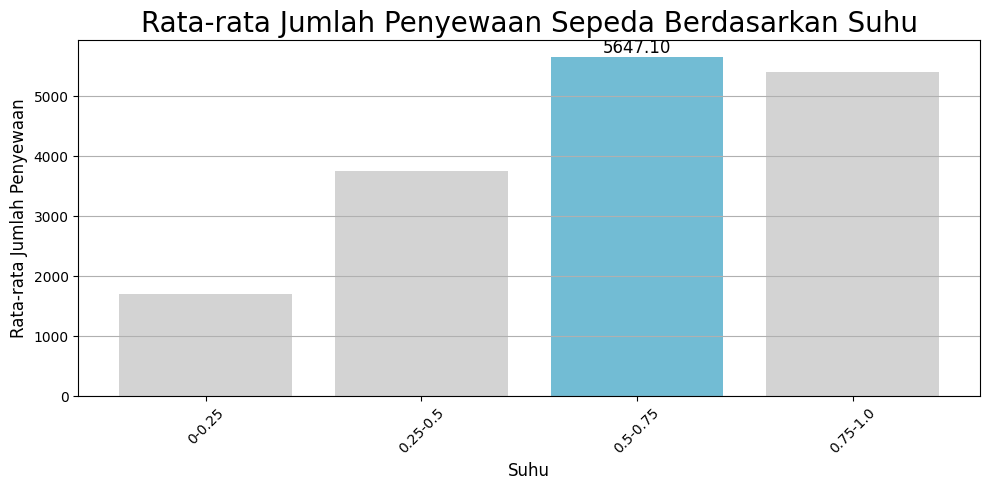

In [165]:
#(4.b) Menghitung rata-rata jumlah penyewaan berdasarkan rentang suhu

#Menyorot warna data paling besar
max_value = avg_rentals_temp['cnt'].max()
colors = ['#D3D3D3' if value < max_value else '#72BCD4' for value in avg_rentals_temp['cnt']]

plt.figure(figsize=(10, 5))
plt.bar(avg_rentals_temp.index, avg_rentals_temp['cnt'], color=colors)
plt.title("Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Suhu", loc="center", fontsize=20)
plt.xlabel("Suhu", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

#Menambahkan anotasi untuk bar dengan nilai tertinggi
max_idx = avg_rentals_temp['cnt'].idxmax()
plt.text(max_idx, max_value, f'{max_value:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

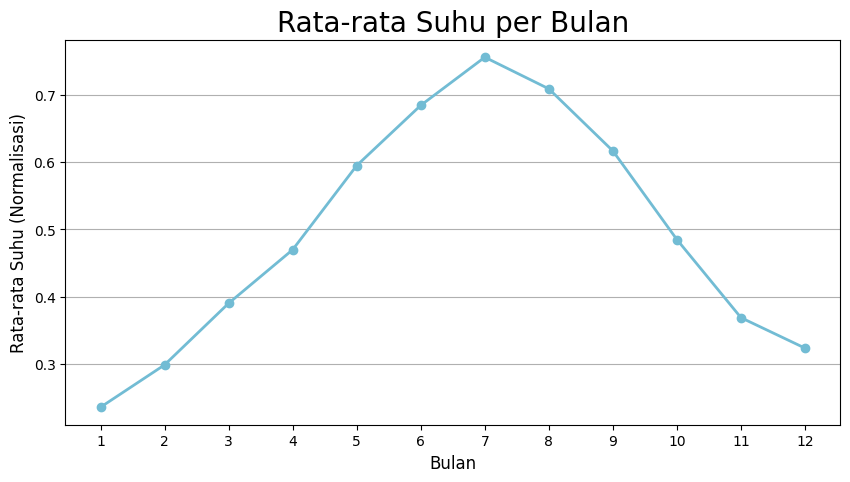

In [158]:
#(4.c) Menghitung rata-rata suhu per bulan
avg_temp_per_month = day.groupby('mnth').agg({
    'temp': 'mean'
}).sort_index()

plt.figure(figsize=(10, 5))
plt.plot(avg_temp_per_month.index, avg_temp_per_month['temp'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-rata Suhu per Bulan", loc="center", fontsize=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Suhu (Normalisasi)", fontsize=12)
plt.xticks(avg_temp_per_month.index, fontsize=10)
plt.grid(axis='y')
plt.show()

### Pertanyaan 5: Apakah terdapat tren peningkatan penggunaan sepeda dari tahun 2011 ke 2012?

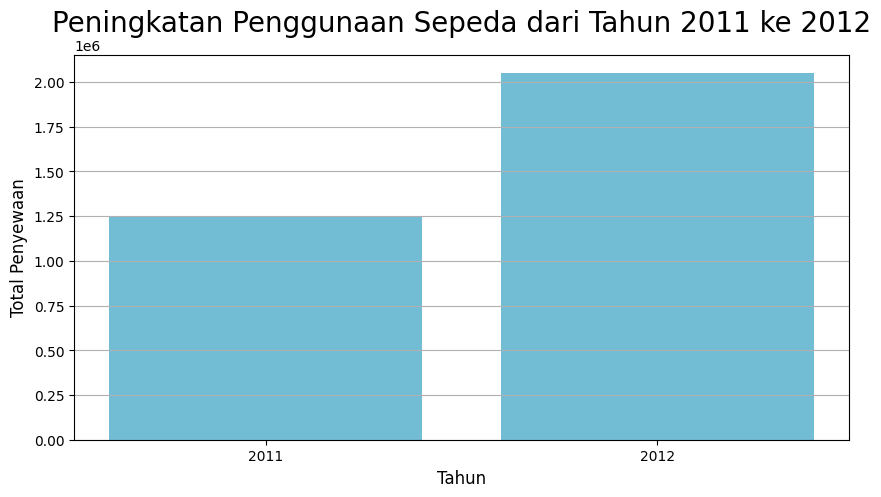

In [160]:
#(5) Menghitung total penyewaan per tahun

yearly_rentals = day.groupby(by=["yr"]).agg({
    "cnt": "sum"
})

plt.figure(figsize=(10, 5))
plt.bar(yearly_rentals.index.astype(str), yearly_rentals['cnt'], color="#72BCD4")
plt.title("Peningkatan Penggunaan Sepeda dari Tahun 2011 ke 2012", loc="center", fontsize=20)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks([0, 1], ['2011', '2012'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insight:**
 - Pelanggan lebih nyaman bersepada pada suhu yang nyama kisaran 20-30 C.
 - Terdapat perbedaan jam ramai saat hari kerja dan hari libur dimana pada hari kerja jam ramai yaitu antara jam 07.00-09.00 dan 16.00-18.00, sedangkan pada hari biasa jam ramai yaitu antara jam 10.00-18.00.
 - Pada hari libur, penyewaan lebih merata sepanjang hari, dengan sedikit peningkatan pada siang hingga sore hari (sekitar pukul 10-18), mengindikasikan penggunaan rekreasi.
 - Jumlah penyewaan di hari kerja cenderung lebih tinggi pada jam-jam sibuk dibandingkan hari libur.

## Analisis Lanjutan (Opsional)

###Clustering Menggunakan Binning

In [148]:
#Menghitung jumlah penyewaan sepeda berdasarkan temperature suhunya menggunakan teknik Binning

#Mendefinisikan bin berdasarkan nilai temp
bins = [0, 0.25, 0.5, 0.75, 1]
labels = ['0-10°C', '10-20°C', '20-30°C', '30-40°C']  # Label untuk setiap bin

#Melakukan binning pada kolom 'temp'
day['temp_category'] = pd.cut(day['temp'], bins=bins, labels=labels)

#Menghitung jumlah penyewa (cnt) berdasarkan kategori suhu
day.groupby('temp_category').agg(
    total_rentals=('cnt', 'sum'),  #Menghitung jumlah total penyewaan (sum dari cnt)
    average_rentals=('cnt', 'mean'),  #Menghitung rata-rata penyewaan (mean dari cnt)
    count_of_days=('instant', 'nunique')  #Menghitung jumlah hari dari kolom insight
).reset_index()

<ipython-input-148-4bd0db01d6a3>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day.groupby('temp_category').agg(


,temp_category,total_rentals,average_rentals,count_of_days
0,0-10°C,107300,1703.174603,63
1,10-20°C,1142570,3758.453947,304
2,20-30°C,1756249,5647.102894,311
3,30-40°C,286560,5406.792453,53


###Clustering Menggunakan Manual Grouping

In [149]:
#Menghitung jumlah penyewaan sepeda berdasarkan musimnya menggunakan teknik Manual Grouping

#Manual grouping: Mengganti nilai season dengan nama musim
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

#Mengganti nilai kolom 'season' dengan nama musim menggunakan mapping
day['season_label'] = day['season'].map(season_mapping)

#Mengelompokkan berdasarkan 'season_label' dan menghitung jumlah penyewaan sepeda
day.groupby('season_label').agg(
    total_rentals=('cnt', 'sum'),  #Menghitung jumlah total penyewaan (sum dari cnt)
    average_rentals=('cnt', 'mean'),  #Menghitung rata-rata penyewaan (mean dari cnt)
    count_of_days=('instant', 'nunique')  #Menghitung jumlah hari dari kolom insight
).reset_index()

,season_label,total_rentals,average_rentals,count_of_days
0,Fall,1061129,5644.303191,188
1,Spring,471348,2604.132597,181
2,Summer,918589,4992.331522,184
3,Winter,841613,4728.162921,178


In [150]:
#Menghitung jumlah penyewaan sepeda berdasarkan cuacanya menggunakan teknik Manual Grouping

#Manual grouping: Mengganti nilai weathersit dengan deskripsi cuaca
weather_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

#Mengganti nilai kolom 'weathersit' dengan deskripsi cuaca menggunakan mapping
day['weather_label'] = day['weathersit'].map(weather_mapping)

#Mengelompokkan berdasarkan 'weather_label' dan menghitung jumlah penyewaan sepeda
day.groupby('weather_label').agg(
    total_rentals=('cnt', 'sum'),  #Menghitung jumlah total penyewaan (sum dari cnt)
    average_rentals=('cnt', 'mean'),  #Menghitung rata-rata penyewaan (mean dari cnt)
    count_of_days=('instant', 'nunique')  #Menghitung jumlah hari dari kolom insight
).reset_index()

,weather_label,total_rentals,average_rentals,count_of_days
0,Clear,2257952,4876.786177,463
1,Cloudy,996858,4035.862348,247
2,Light Rain,37869,1803.285714,21


## Conclusion

- 1: Pelanggan memiliki minat yang besar pada penyewaan sepeda saat musim gugur dan kemarau, selain itu pelanggan juga memiliki minat yang besar saat cuaca nyaman/tidak badai/baik-baik saja.
- 2: Kondisi suhu/temperatur dimana pelanggan ramai menyewa sepeda rata-rata berada di kisaran 20-30 C pada semua musim.
- 3: Ya, terdapat perbedaan jam ramai pada hari kerja dan hari libur dimana pada hari kerja jam ramai yaitu antara jam 07.00-09.00 dan 16.00-18.00, sedangkan pada hari biasa jam ramai yaitu antara jam 10.00-18.00.
- 4: Kisaran bulan saat pelanggan ramai menyewa sepeda yaitu bulan May-Oktober. Hal tersebut dikarenakan suhu pada bulan itu nyaman untuk bersepeda dimana kisaran 20-30 C.
- 5: Terdapat penaikan tren pada tahun 2012.

In [152]:
#Membuat berkas dataset baru bernama 'df_hour' dengan tambahan data dari gabungan dataset day dan hour

df_hour = pd.DataFrame(hour)
df_day = pd.DataFrame(day)

#Menambahkan kolom 'temp_mean' ke dataset df_hour
df_day['temp_mean'] = df_day['temp']
df_hour = df_hour.merge(df_day[['dteday', 'temp_mean']], on='dteday', how='left')

#Menambahkan kolom 'temp_category' ke dataset df_hour
def categorize_temp(temp_mean):
    if 0 <= temp_mean <= 0.25:
        return 1 #0-10°C
    elif 0.25 < temp_mean <= 0.5:
        return 2 #10-20°C
    elif 0.5 < temp_mean <= 0.75:
        return 3 #20-30°C
    else:
        return 4 #30-40°C

df_hour['temp_category'] = df_hour['temp_mean'].apply(categorize_temp)

# Menambahkan kolom 'weathersit_mean' ke dataset df_hour
df_day['weathersit_mean'] = df_day['weathersit'].round(0).astype(int)
df_hour = df_hour.merge(df_day[['dteday', 'weathersit_mean']], on='dteday', how='left')

# Menyimpan df_hour ke dalam file CSV
file_path = 'df_hour.csv'
df_hour.to_csv(file_path, index=False)

# Menampilkan hasil
df_hour.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_mean,temp_category,weathersit_mean
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.344167,2,2
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.344167,2,2
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.344167,2,2
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.344167,2,2
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0.344167,2,2
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,0.344167,2,2
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,0.344167,2,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,0.344167,2,2
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,0.344167,2,2
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,0.344167,2,2
